<a href="https://colab.research.google.com/github/gityag/music-transcription/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import PIL
from PIL import Image
from IPython.display import Image, display
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/.shortcut-targets-by-id/1jFgwCKNtKSeDkWhZHi7du5qr835eaIvE/kaggle


In [ ]:
!ls

kaggle.json  musicnet  musicnet_metadata.csv  musicnet_midis  musicnet.npz


In [ ]:
import time
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


input_directory = './musicnet/musicnet/train_data'

output_directory = './musicnet/musicnet/spectrograms_train'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all .wav files in the input directory
audio_files = [f for f in os.listdir(input_directory) if f.endswith('.wav')]

def generate_spectrogram(start, end):
    for i in range(start, min(end, len(audio_files))):
        audio_file = audio_files[i]

        # Load the .wav audio file
        audio_path = os.path.join(input_directory, audio_file)
        y, sr = librosa.load(audio_path)

        # Generate the spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

        # Save the spectrogram as an image
        spectrogram_file = os.path.splitext(audio_file)[0] + '.jpg'
        output_path = os.path.join(output_directory, spectrogram_file)

        plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.savefig(output_path, bbox_inches='tight')
        plt.close()

        print(f'Spectrogram conversion completed for {audio_file}.')

KeyboardInterrupt: ignored

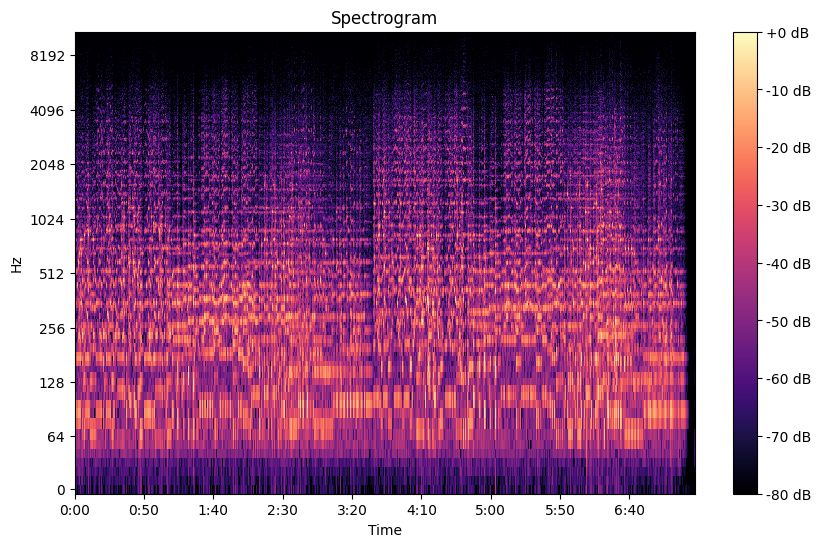

In [ ]:
# Generate spectrograms for the specified range of .wav files
generate_spectrogram(0, 5)

In [ ]:
generate_spectrogram(5,10)

In [ ]:
generate_spectrogram(10,15)

In [ ]:
generate_spectrogram(15,20)

KeyboardInterrupt: ignored

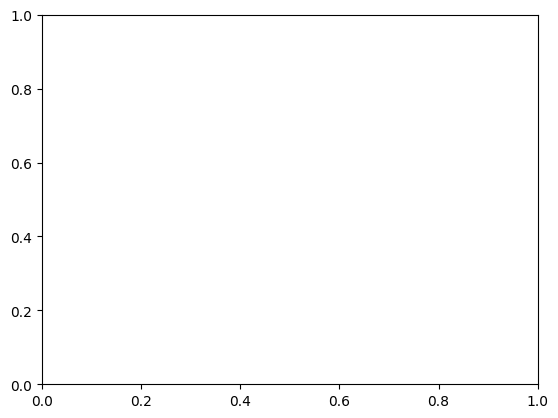

In [ ]:
#For test data
# Replace 'input_directory' with the path to the directory containing your audio files
input_directory = './musicnet/musicnet/test_data'

# Replace 'output_directory' with the path to the directory where you want to save the spectrogram images
output_directory = './musicnet/musicnet/spectrograms_test'

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# List all .wav files in the input directory
audio_files = [f for f in os.listdir(input_directory) if f.endswith('.wav')]

# Set the batch size
batch_size = 5
spectrogram_arrays = []
# Process the audio files in batches
for i in range(0, len(audio_files), batch_size):
    batch = audio_files[i:i + batch_size]

    for audio_file in batch:
        # Load the .wav audio file
        audio_path = os.path.join(input_directory, audio_file)
        y, sr = librosa.load(audio_path)

        # Generate the spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        spectrogram_array = np.array(D)
        spectrogram_arrays.append(spectrogram_array)
        # Create a subdirectory for each batch
        # batch_output_directory = os.path.join(output_directory, f'batch_{i // batch_size}')
        # os.makedirs(batch_output_directory, exist_ok=True)

        # Save the spectrogram as an image
        spectrogram_file = os.path.splitext(audio_file)[0] + '.jpg'
        output_path = os.path.join(output_directory, spectrogram_file)

        # plt.figure(figsize=(10, 6))
        librosa.display.specshow(D, sr=sr)
        fig = plt.gcf()
        fig.set_size_inches(8, 6)
        fig.savefig(output_path, bbox_inches='tight', pad_inches=0)
        # plt.colorbar(format='%+2.0f dB')
        # plt.title('Spectrogram')
        # plt.savefig(output_path, bbox_inches='tight')
        # plt.close()
    print(f'Spectrogram conversion completed for {batch_size} audio files.')
print(spectrogram_arrays)

In [ ]:
output_directory = './musicnet/musicnet/spectrograms_test'
image_files = [f for f in os.listdir(output_directory) if f.endswith('.jpg')]

# Initialize an empty list to store spectrogram arrays
spectrogram_arrays = []
from PIL import Image
for image_file in image_files:
  image_path = os.path.join(output_directory, image_file)
    # Open the image using Pillow (PIL)
  image1 = Image.open(image_path)

    # Convert the image to a NumPy array
  spectrogram_array = np.array(image1)


    # Append the array to the list
  spectrogram_arrays.append(spectrogram_array)

print(spectrogram_arrays)

[array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 2, 0],
        [0, 0, 0],
        [8, 0, 3],
        ...,
        [0, 0, 4],
        [0, 0, 5],
        [1, 0, 5]],

       [[0, 2, 0],
        [0, 0, 0],
        [8, 0, 3],
        ...,
        [0, 0, 2],
        [0, 0, 4],
        [0, 0, 4]],

       [[0, 2, 0],
        [0, 0, 0],
        [9, 0, 3],
        ...,
        [0, 1, 2],
        [0, 0, 4],
        [0, 0, 4]]], dtype=uint8), array([[[  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2],
        ...,
        [  0,   0,   2],
        [  0,   0,   2],
        [  0,   0,   2]],

       [[  0,   0,   2],
        

Converting into Piano Roll

In [ ]:
import pandas as pd

data = pd.read_csv('./musicnet/musicnet/test_labels/1759.csv')

# Define the time range based on your data
start_time = data['start_time'].min()
end_time = data['end_time'].max()

# Define the time resolution (adjust as needed)
time_resolution = 0.01  # Set to an appropriate value (e.g., 0.01 seconds)

# Calculate the number of time steps
num_time_steps = int((end_time - start_time) / time_resolution)

# Create an empty piano roll
piano_roll = np.zeros((num_time_steps, 128), dtype=bool)  # 128 represents the number of MIDI notes (0-127)

# Calculate the time step indices for start and end times
start_steps = ((data['start_time'] - start_time) / time_resolution).astype(int)
end_steps = ((data['end_time'] - start_time) / time_resolution).astype(int)

# Get the note values
note_values = data['note'].astype(int)
count = 0
# Fill the piano roll using vectorized operations
for start_step, end_step, note_value in zip(start_steps, end_steps, note_values):
    piano_roll[start_step:end_step, note_value] = 1
    count = count+1
    print(count)

FileNotFoundError: ignored

IndentationError: ignored